<a href="https://colab.research.google.com/github/TUIlmenauAMS/CoronaComputationPrograms/blob/master/coronaconcucrrentlysick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change Calculated, Corona Update 2

Prof. Dr.-Ing. G. Schuller

Ilmenau University of Technology

Institute for Media Technology

July, 2020


## Comparison of infection risk in different countries

The numbers of recovered and deaths became significant, so that they must be taken into account in the calculation.
The number of concurrently sick is the number of infected minus the number of recovered and deaths.

Database is the Johns-Hopkins GitHub repository
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series

The countries to compute and plot are set in the variable "coutries", their population in Millions in the variable "population", and the starting date of the plots in the variable "statdate", see below.
To recompute, click on the cell and then on the play button.

countries= ['Italy', 'Germany', 'Spain', 'Brazil', 'US', 'Russia', 'Korea, South', 'Austria', 'Lebanon', 'Sweden', 'Chile']
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Concurrently sick internationally')

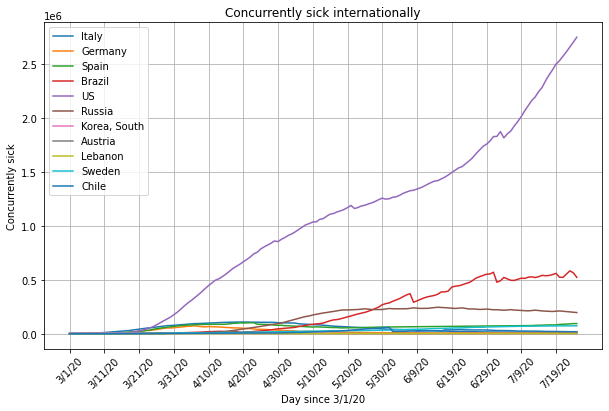

In [ ]:
#Number of concurrently sick from data from JHU github
#Computes the difference of detected infected minus recovered minus deaths
#Gerald Schuller, May 2020

countries = ['Italy', 'Germany', 'Spain', 'Brazil', 'US', 'Russia','Korea, South', 'Austria', 'Lebanon', 'Sweden','Chile']#, 'Ukraine']
population=[60.36, 83.02, 46.94, 209.5, 328.2, 144.5, 51.64, 8.859, 6.849, 10.23, 18.73]#, 42]
#countries = ['Germany', 'US']
#population=[60.36, 328.2]
startdate='3/1/20'

import numpy as np
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

#Read data from github:
import urllib.request
import pandas as pd

Retrievedata=True

#Cases
if Retrievedata:
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
   urllib.request.urlretrieve(url, './corona_cases.csv')
#('./corona_cases.csv', <http.client.HTTPMessage object at 0x7fc7d89c0f98>)
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
   urllib.request.urlretrieve(url, './corona_recovered.csv')
   url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
   urllib.request.urlretrieve(url, './corona_deaths.csv')



print("countries=", countries)

#detected cases:
df = pd.read_csv('./corona_cases.csv')
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datacases=df.loc[countries,: ]

#recovered cases:
df = pd.read_csv('./corona_recovered.csv')
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datarecovered=df.loc[countries,: ]

#death cases:
df = pd.read_csv('./corona_deaths.csv')
#df.head()
df=df.drop(['Lat','Long','Province/State'], axis=1)
df=df.set_index('Country/Region')
datadeaths=df.loc[countries,: ]

dates=datacases.loc[countries[0],startdate:].index
#print("dates=\n",dates)

countrycases=datacases.loc[countries,startdate:].reset_index(drop=True)
countrycases=np.array(countrycases)
countryrecovered=datarecovered.loc[countries,startdate:].reset_index(drop=True)
countryrecovered=np.array(countryrecovered)
countrydeaths=datadeaths.loc[countries,startdate:].reset_index(drop=True)
countrydeaths=np.array(countrydeaths)
concurrentlysick=countrycases-countryrecovered-countrydeaths #factor of increase f for each country

#%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

fig, ax = plt.subplots(1,1) 
ax.plot(dates,concurrentlysick.T)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)

#plt.plot(concurrentlysick.T)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Concurrently sick')
plt.grid()
plt.title('Concurrently sick internationally')
#plt.show()


## Concurrently sick per million inhabitants

Since countries have very different populations, it makes sense to calculate the concurrently sick per million inhabitants.
It is obtained by dividing the number of concurrently sick by the number of inhabitants in millions.
This is also what is needed to estimate the risk of infection. To get a more accurate estimate, it should be multiplied by the rough under detection rate (not included here for simplicity).

<Figure size 720x432 with 0 Axes>

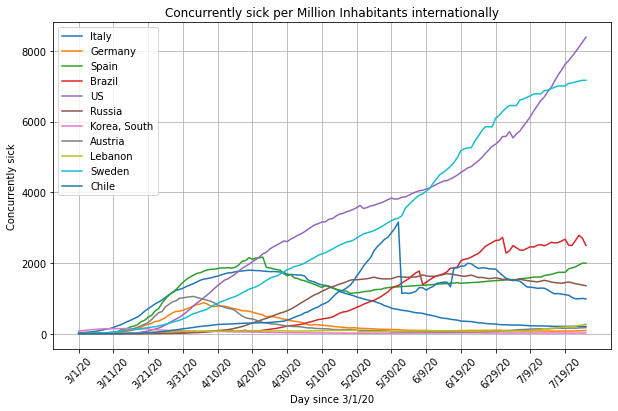

<Figure size 720x432 with 0 Axes>

In [ ]:
#print("concurrentlysick.T.shape", concurrentlysick.T,"population.shape", population)
fig, ax = plt.subplots(1,1) 
ax.plot(dates,concurrentlysick.T/population)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)
#plt.plot(concurrentlysick.T/population)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Concurrently sick')
plt.grid()
plt.title('Concurrently sick per Million Inhabitants internationally')
#plt.axis([1,31,0, 2])
#plt.show()
plt.figure()

## Resulting death cases per million inhabitants

<Figure size 720x432 with 0 Axes>

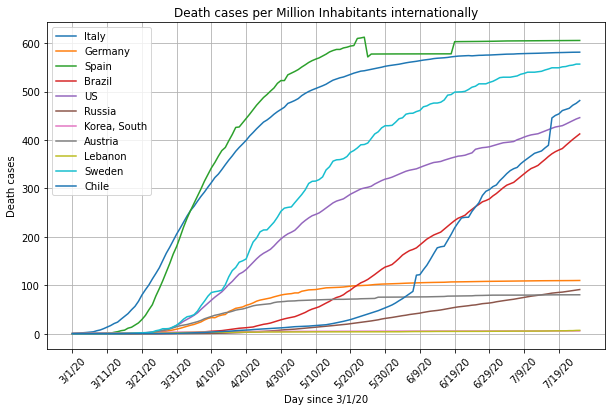

<Figure size 720x432 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1,1) 
ax.plot(dates,countrydeaths.T/population)
ax.set_xticks(np.arange(0,len(dates),10))
plt.xticks(rotation=45)
#plt.plot(countrydeaths.T/population)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Death cases')
plt.grid()
plt.title('Death cases per Million Inhabitants internationally')
#plt.axis([1,31,0, 2])
#plt.show()
plt.figure()


## Increase factor of the concurrently sick

For analysis, we can calculate the increase factor of the concurrently sick as a quotient of the numbers for two consecutive days.
This quotient is the same for the absolute numbers or for the number of concurrently sick per million inhabitants.
It is related to the reproductive factor but not the same.

- Values greater than 1: Increase,

- less than 1: decrease,

- a constant value above 1: Exponential growth, similar to a fire that spreads.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


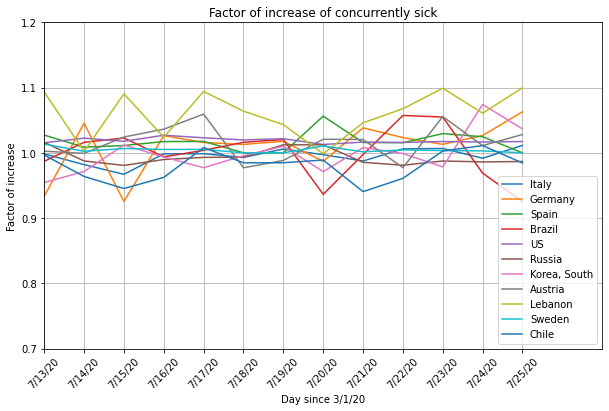

In [ ]:
currsickfactorsofincrease=concurrentlysick[:,1:]/(concurrentlysick[:,:-1]) #factor of increase f for each country
fig, ax = plt.subplots(1,1) 
ax.plot(dates[1:],currsickfactorsofincrease.T)
#ax.set_xticks(np.arange(0,len(dates[1:]),10))
plt.xticks(rotation=45)
#plt.plot(currsickfactorsofincrease.T)
plt.legend(countries)
plt.xlabel('Day since '+startdate)
plt.ylabel('Factor of increase')
plt.grid()
plt.title('Factor of increase of concurrently sick')
plt.axis([len(dates)-14, len(dates),0.7, 1.2])
#ax.set_ylim(bottom=0.5, top=1.3)
plt.show()